In [414]:
import numpy as np   
import pandas as pd    
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import matplotlib.pyplot as plt   
import matplotlib.style

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV

Read the data

In [415]:
data_df=pd.read_csv('cubic_zirconia.csv')

Check the Head

In [379]:
data_df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,2,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,3,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,4,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,5,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


**Get the info**

In [416]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26967 entries, 0 to 26966
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  26967 non-null  int64  
 1   carat       26967 non-null  float64
 2   cut         26967 non-null  object 
 3   color       26967 non-null  object 
 4   clarity     26967 non-null  object 
 5   depth       26270 non-null  float64
 6   table       26967 non-null  float64
 7   x           26967 non-null  float64
 8   y           26967 non-null  float64
 9   z           26967 non-null  float64
 10  price       26967 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 2.3+ MB


**Get the Summary Statistics**

In [417]:
data_df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Unnamed: 0,26967,NaN,NaN,NaN,13484,7784.85,1,6742.5,13484,20225.5,26967
carat,26967,NaN,NaN,NaN,0.798375,0.477745,0.2,0.4,0.7,1.05,4.5
cut,26967,5,Ideal,10816,NaN,NaN,NaN,NaN,NaN,NaN,NaN
color,26967,7,G,5661,NaN,NaN,NaN,NaN,NaN,NaN,NaN
clarity,26967,8,SI1,6571,NaN,NaN,NaN,NaN,NaN,NaN,NaN
depth,26270,NaN,NaN,NaN,61.7451,1.41286,50.8,61,61.8,62.5,73.6
table,26967,NaN,NaN,NaN,57.4561,2.23207,49,56,57,59,79
x,26967,NaN,NaN,NaN,5.72985,1.12852,0,4.71,5.69,6.55,10.23
y,26967,NaN,NaN,NaN,5.73357,1.16606,0,4.71,5.71,6.54,58.9
z,26967,NaN,NaN,NaN,3.53806,0.720624,0,2.9,3.52,4.04,31.8


**Check for Null Values**

In [30]:
data_df.isnull().sum()

Unnamed: 0      0
carat           0
cut             0
color           0
clarity         0
depth         697
table           0
x               0
y               0
z               0
price           0
dtype: int64

**% Null values**

In [39]:
data_df.isnull().sum()/data_df.isnull().sum().sum()*100

Unnamed: 0      0.0
carat           0.0
cut             0.0
color           0.0
clarity         0.0
depth         100.0
table           0.0
x               0.0
y               0.0
z               0.0
price           0.0
dtype: float64

**Since Unnamed  hcolumn is not required, we would drop this column for now**

In [418]:
data_df=data_df.drop(['Unnamed: 0'],axis=1)

In [10]:
data_df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


**Check for Duplicates**

In [202]:
data_df.duplicated().sum()

34

In [6]:
duplicate = data_df[data_df.duplicated()]

In [13]:
duplicate

,carat,cut,color,clarity,depth,table,x,y,z,price
4756,0.35,Premium,J,VS1,62.4,58.0,5.67,5.64,3.53,949
6215,0.71,Good,F,SI2,64.1,60.0,0.00,0.00,0.00,2130
8144,0.33,Ideal,G,VS1,62.1,55.0,4.46,4.43,2.76,854
8919,1.52,Good,E,I1,57.3,58.0,7.53,7.42,4.28,3105
9818,0.35,Ideal,F,VS2,61.4,54.0,4.58,4.54,2.80,906
10473,0.79,Ideal,G,SI1,62.3,57.0,5.90,5.85,3.66,2898
10500,1.00,Premium,F,VVS2,60.6,54.0,6.56,6.52,3.96,8924
12894,1.21,Premium,D,SI2,62.5,57.0,6.79,6.71,4.22,6505
13547,0.43,Ideal,G,VS1,61.9,55.0,4.84,4.86,3.00,943
13783,0.79,Ideal,G,SI1,62.3,57.0,5.90,5.85,3.66,2898


In [419]:
data_df.drop_duplicates(inplace=True)
data_df.duplicated().sum()

0

**Check for Object Data Type**

In [382]:
data_df.select_dtypes(include='object').head()

,cut,color,clarity
0,Ideal,E,SI1
1,Premium,G,IF
2,Very Good,E,VVS2
3,Ideal,F,VS1
4,Ideal,F,VVS1


In [16]:
data_df.isin([0]).sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          2
y          2
z          8
price      0
dtype: int64

In [383]:
data_df['x']=data_df['x'].replace(0, np.nan)
data_df['y']=data_df['y'].replace(0, np.nan)
data_df['z']=data_df['z'].replace(0, np.nan)
data_df.isin([0]).sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

**Find out unique values in each categorical column**

In [384]:
data_df['cut'].unique()

array(['Ideal', 'Premium', 'Very Good', 'Good', 'Fair'], dtype=object)

In [448]:
data_df.hist(column='cut')

ValueError: hist method requires numerical columns, nothing to plot.

In [10]:
data_df['color'].unique()

array(['E', 'G', 'F', 'D', 'H', 'J', 'I'], dtype=object)

In [22]:
data_df['clarity'].unique()

array(['SI1', 'IF', 'VVS2', 'VS1', 'VVS1', 'VS2', 'SI2', 'I1'],
      dtype=object)

In [11]:
data_df.median()

carat       0.70
depth      61.80
table      57.00
x           5.69
y           5.70
z           3.52
price    2375.00
dtype: float64

In [420]:
cols=data_df.isnull().sum()[data_df.isnull().sum()>0].index

In [25]:
cols

Index(['depth', 'x', 'y', 'z'], dtype='object')

In [421]:
non_objects=data_df[cols].select_dtypes(exclude=['object','category']).columns

In [422]:

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values = np.nan, strategy = 'median',verbose=0)
imputer= imputer.fit(data_df[non_objects].iloc[:,:])

In [423]:
data_df[non_objects]=imputer.transform(data_df[non_objects])

In [424]:
data_df.isnull().sum()/data_df.isnull().sum().sum()*100

carat     NaN
cut       NaN
color     NaN
clarity   NaN
depth     NaN
table     NaN
x         NaN
y         NaN
z         NaN
price     NaN
dtype: float64

In [450]:
data_df.isnull().sum()

carat           0
cut             0
color           0
depth           0
table           0
x               0
y               0
z               0
price           0
clarity_IF      0
clarity_SI1     0
clarity_SI2     0
clarity_VS1     0
clarity_VS2     0
clarity_VVS1    0
clarity_VVS2    0
dtype: int64

In [237]:
data_df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


In [209]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26967 entries, 0 to 26966
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    26967 non-null  float64
 1   cut      26967 non-null  object 
 2   color    26967 non-null  object 
 3   clarity  26967 non-null  object 
 4   depth    26967 non-null  float64
 5   table    26967 non-null  float64
 6   x        26967 non-null  float64
 7   y        26967 non-null  float64
 8   z        26967 non-null  float64
 9   price    26967 non-null  int64  
dtypes: float64(6), int64(1), object(3)
memory usage: 2.1+ MB


Shape before Outliers Treatment (26933, 10)


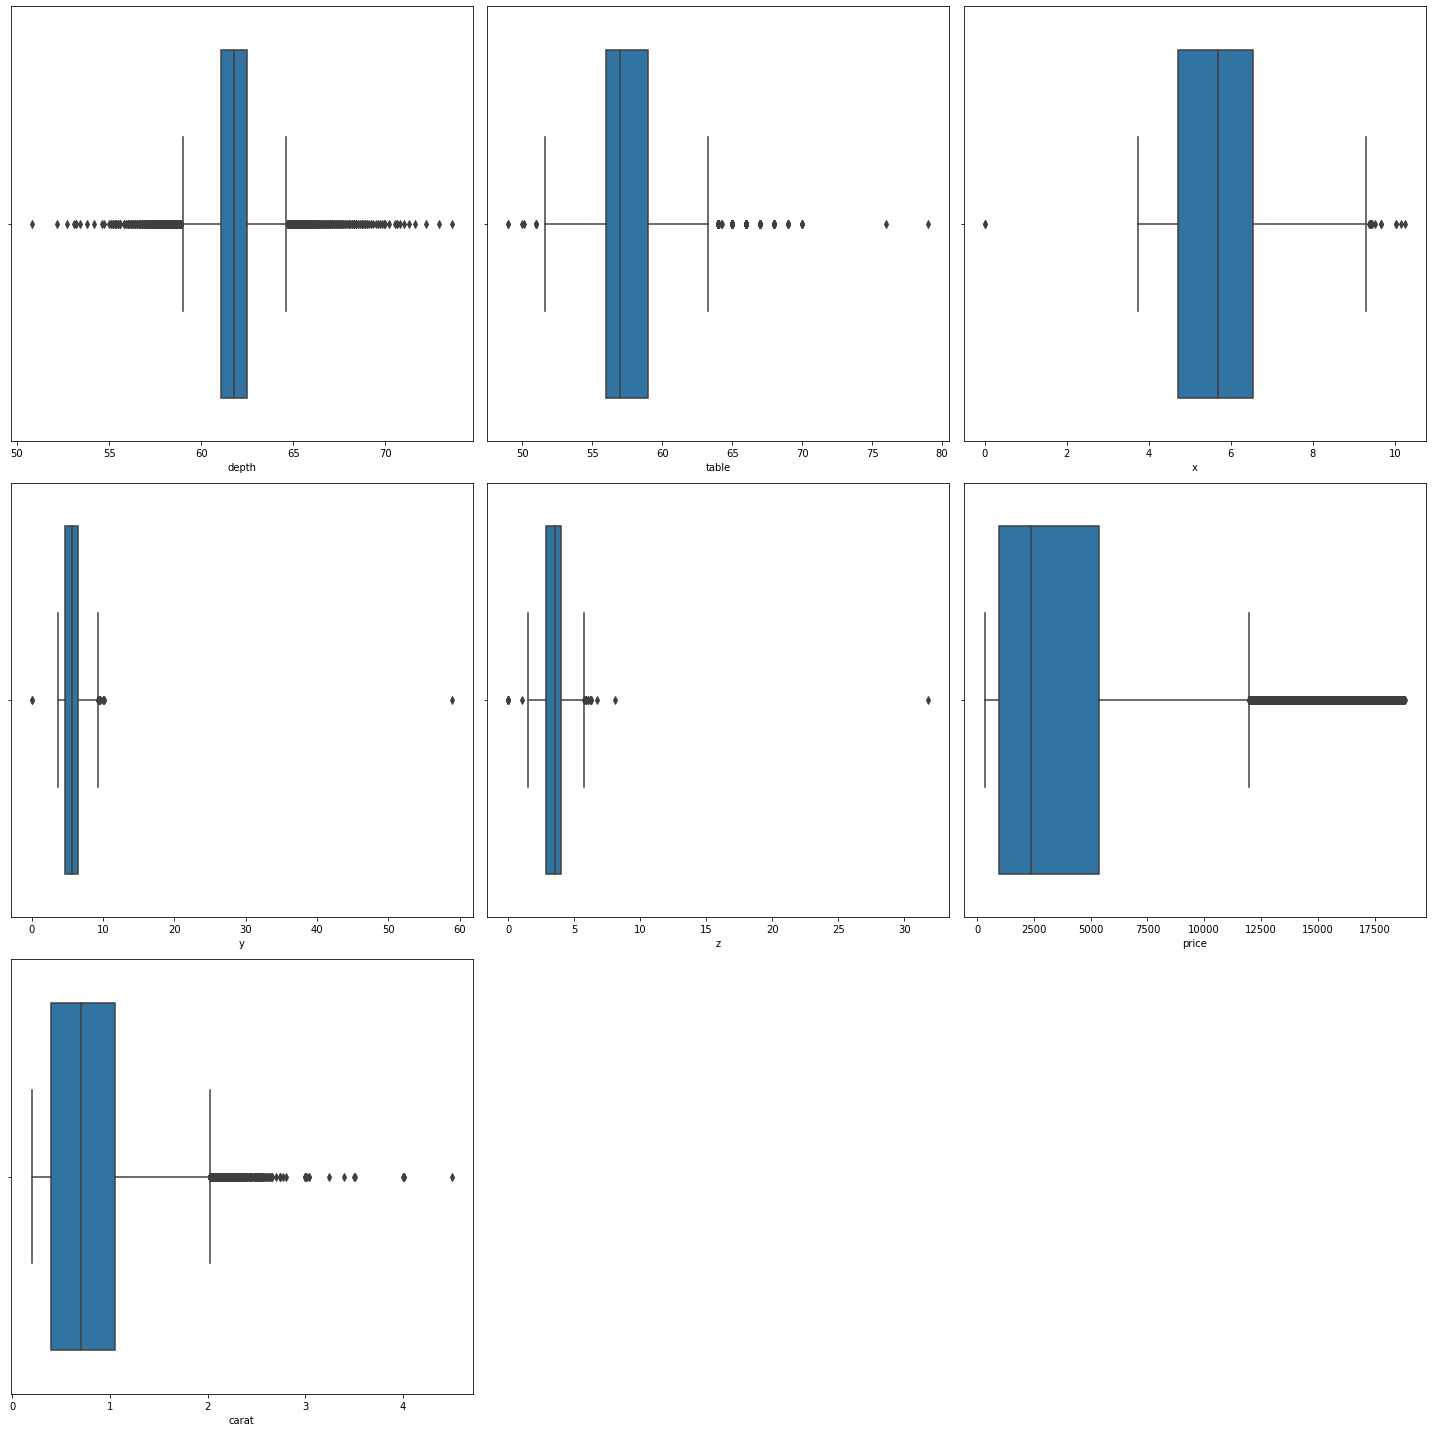

In [425]:
data_plot=data_df[['depth', 'table', 'x', 'y','z','price','carat']]
fig=plt.figure(figsize=(20,20))
for i in range(0,len(data_plot.columns)):
    ax=fig.add_subplot(3,3,i+1)
    sns.boxplot(data_plot[data_plot.columns[i]])
    plt.tight_layout()
print('Shape before Outliers Treatment',data_df.shape)

**Seems like all column have many outliers**

**Univariate Analysis**

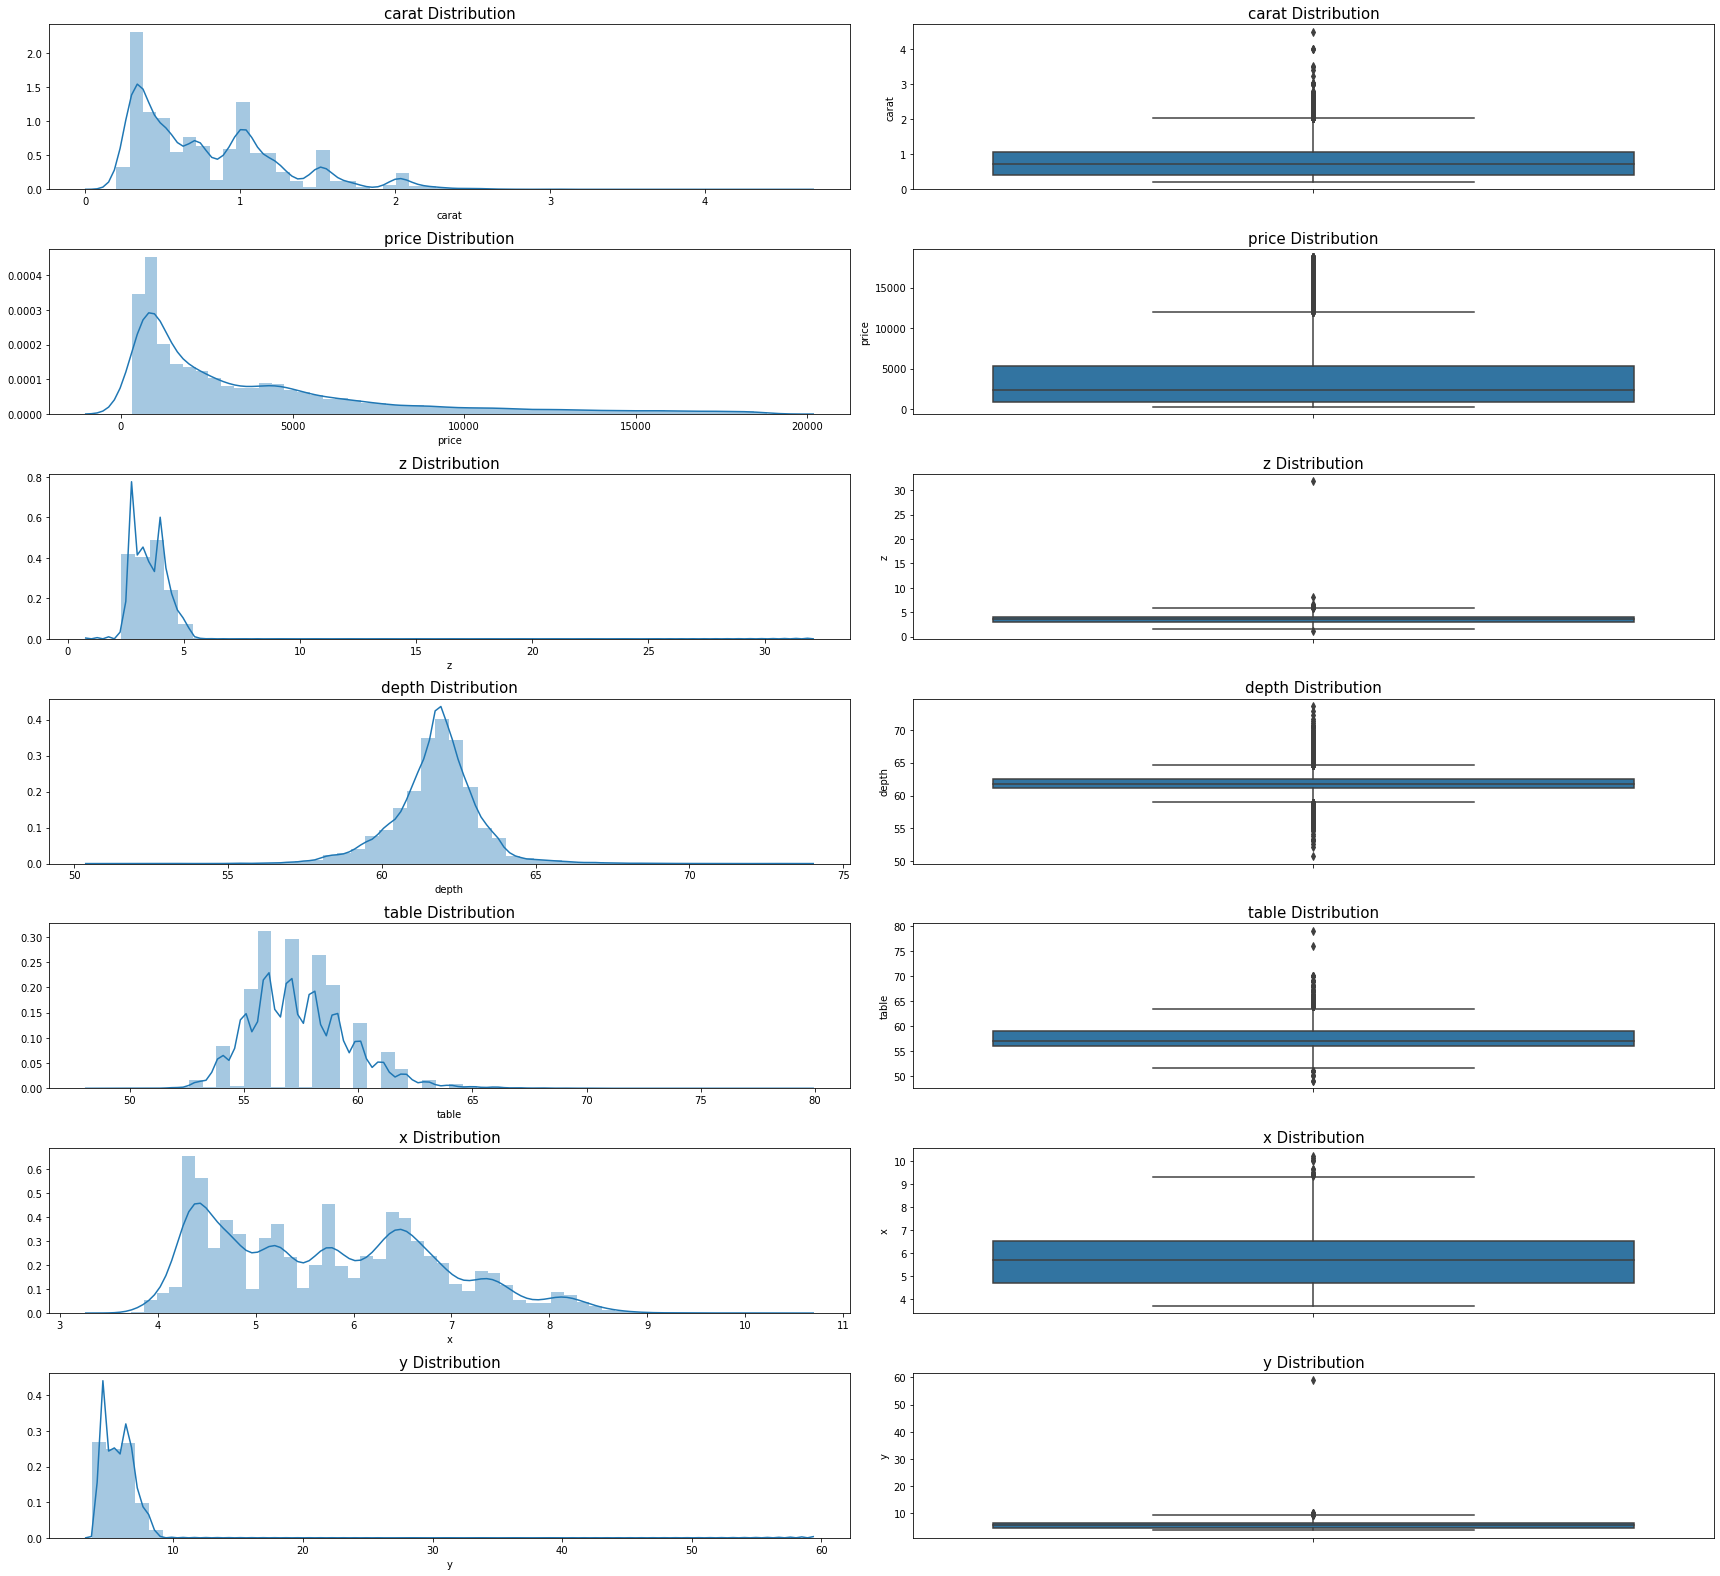

In [391]:
## Univariate except names column
fig, axes = plt.subplots(nrows=7,ncols=2)
fig.set_size_inches(24, 22)
a = sns.distplot(data_df['carat'] , ax=axes[0][0])
a.set_title("carat Distribution",fontsize=15)
a = sns.boxplot(data_df['carat'] , orient = "v" , ax=axes[0][1])
a.set_title("carat Distribution",fontsize=15)

a = sns.distplot(data_df['price'] , ax=axes[1][0])
a.set_title("price Distribution",fontsize=15)

a = sns.boxplot(data_df['price'] , orient = "v" , ax=axes[1][1])
a.set_title("price Distribution",fontsize=15)

a = sns.distplot(data_df['z'] , ax=axes[2][0])
a.set_title("z Distribution",fontsize=15)

a = sns.boxplot(data_df['z'] , orient = "v" , ax=axes[2][1])
a.set_title("z Distribution",fontsize=15)


a = sns.distplot(data_df['depth'] , ax=axes[3][0])
a.set_title("depth Distribution",fontsize=15)

a = sns.boxplot(data_df['depth'] , orient = "v" , ax=axes[3][1])
a.set_title("depth Distribution",fontsize=15)

a = sns.distplot(data_df['table'] , ax=axes[4][0])
a.set_title("table Distribution",fontsize=15)

a = sns.boxplot(data_df['table'] , orient = "v" , ax=axes[4][1])
a.set_title("table Distribution",fontsize=15)

a = sns.distplot(data_df['x'] , ax=axes[5][0])
a.set_title("x Distribution",fontsize=15)

a = sns.boxplot(data_df['x'] , orient = "v" , ax=axes[5][1])
a.set_title("x Distribution",fontsize=15)

a = sns.distplot(data_df['y'] , ax=axes[6][0])
a.set_title("y Distribution",fontsize=15)

a = sns.boxplot(data_df['y'] , orient = "v" , ax=axes[6][1])
a.set_title("y Distribution",fontsize=15)








plt.tight_layout()
plt.show()

**Outliers Treatment**

In [426]:
Q1 = data_df.quantile(0.25) # Getting First quantile for all numerical variables
Q3 = data_df.quantile(0.75) # Getting Second quantile for all numerical variables
IQR = Q3 - Q1          # Getting IQR values
lower_range= Q1-(1.5 * IQR) #Getting Lower Limit for all numerical variables
upper_range= Q3+(1.5 * IQR) #Getting Upper Limit for all numerical variables

In [393]:
lower_range

carat      -0.575
depth      59.000
table      51.500
x           1.950
y           1.990
z           1.190
price   -5671.500
dtype: float64

In [394]:
upper_range

carat        2.025
depth       64.600
table       63.500
x            9.310
y            9.270
z            5.750
price    11972.500
dtype: float64

In [427]:
data_df['carat']=np.where(data_df['carat']> 2.025,2.025,data_df['carat'])

data_df['depth']=np.where(data_df['depth']> 64.600,64.600,data_df['depth'])
data_df['depth']=np.where(data_df['depth']< 59.000,59.000,data_df['depth'])

data_df['table']=np.where(data_df['table']< 51.50,51.50,data_df['table'])
data_df['table']=np.where(data_df['table']> 63.50,63.50,data_df['table'])

data_df['x']=np.where(data_df['x']< 1.95,1.95,data_df['x'])
data_df['x']=np.where(data_df['x']> 9.31,9.31,data_df['x'])

data_df['y']=np.where(data_df['y']< 1.96,1.96,data_df['y'])
data_df['y']=np.where(data_df['y']> 9.28,9.28,data_df['y'])

data_df['z']=np.where(data_df['z']< 1.19,1.19,data_df['z'])
data_df['z']=np.where(data_df['z']> 5.75,5.75,data_df['z'])


##data_df['price']=np.where(data_df['price']> 11982.50,11982.50,data_df['price'])

Shape after Outliers Treatment (26933, 10)


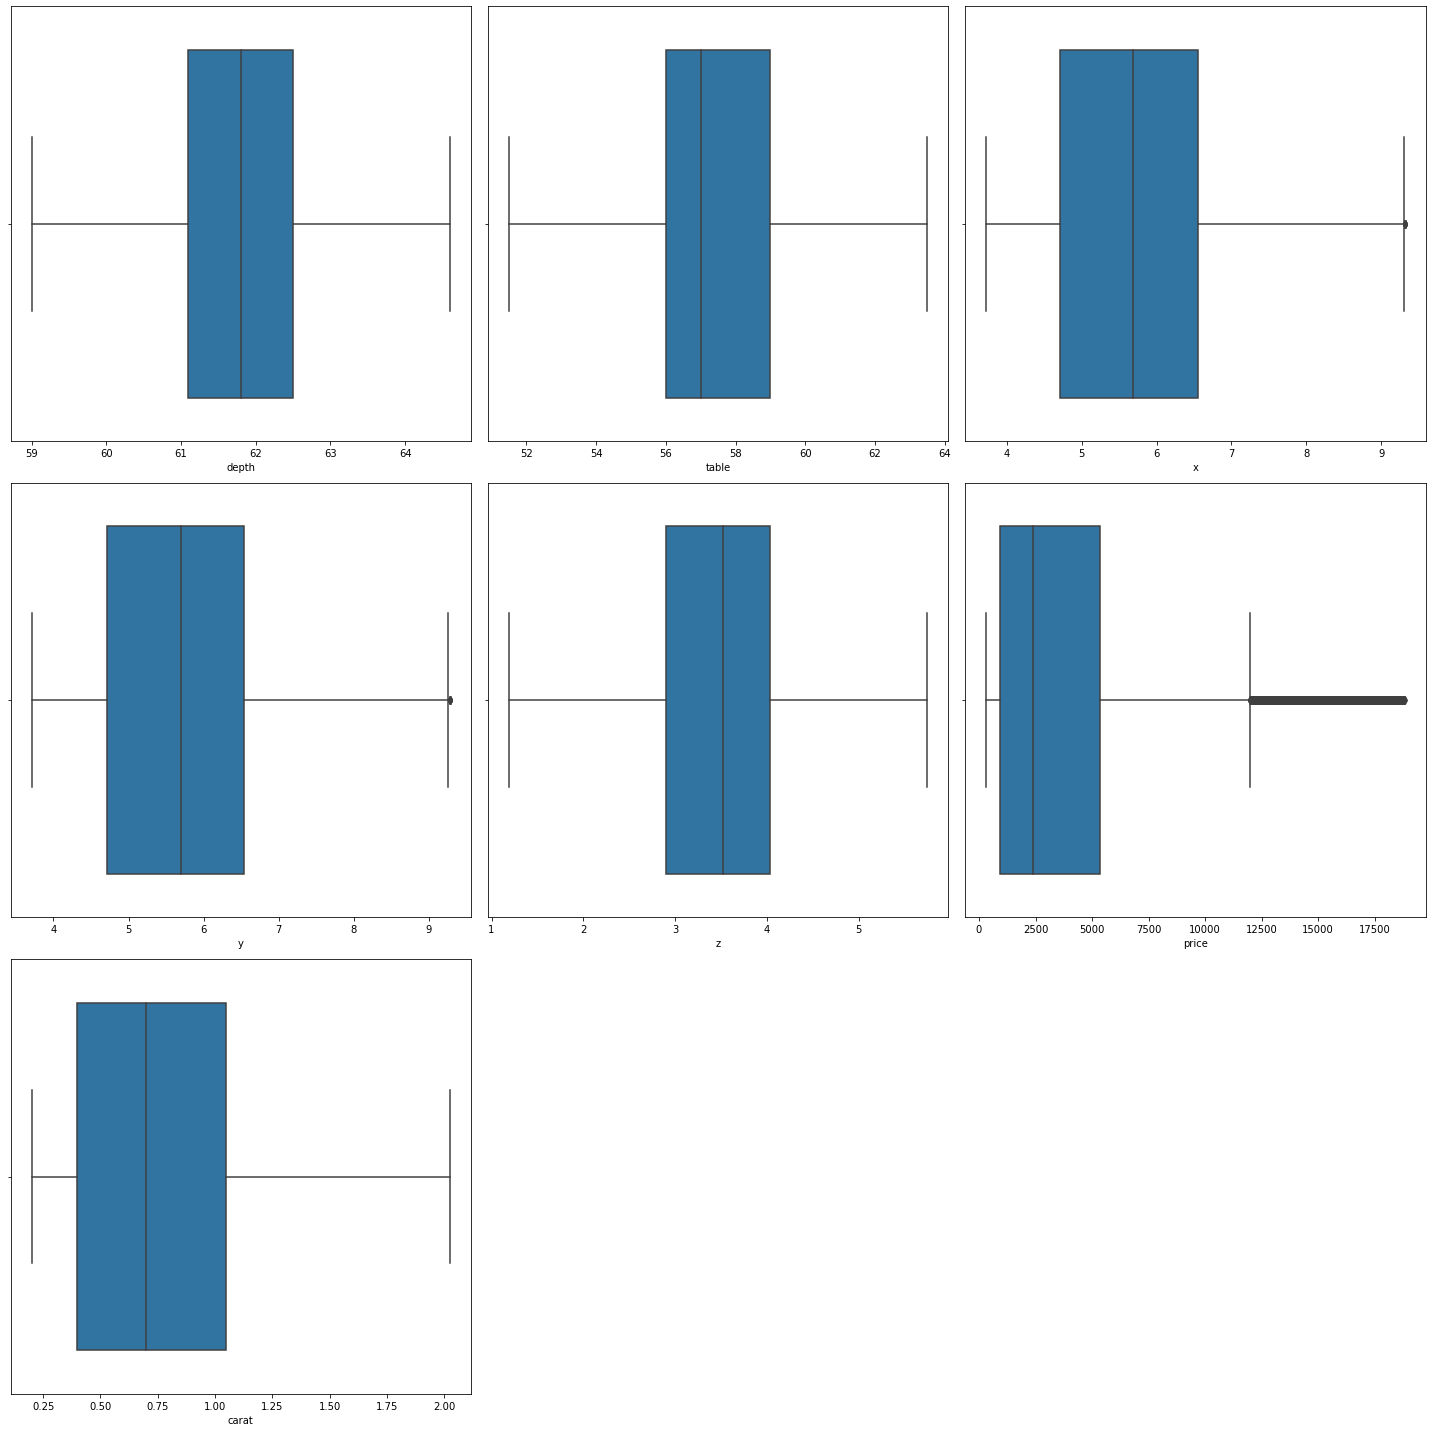

In [54]:
data_plot=data_df[['depth', 'table', 'x', 'y','z','price','carat']]
fig=plt.figure(figsize=(20,20))
for i in range(0,len(data_plot.columns)):
    ax=fig.add_subplot(3,3,i+1)
    sns.boxplot(data_plot[data_plot.columns[i]])
    plt.tight_layout()
print('Shape after Outliers Treatment',data_df.shape)

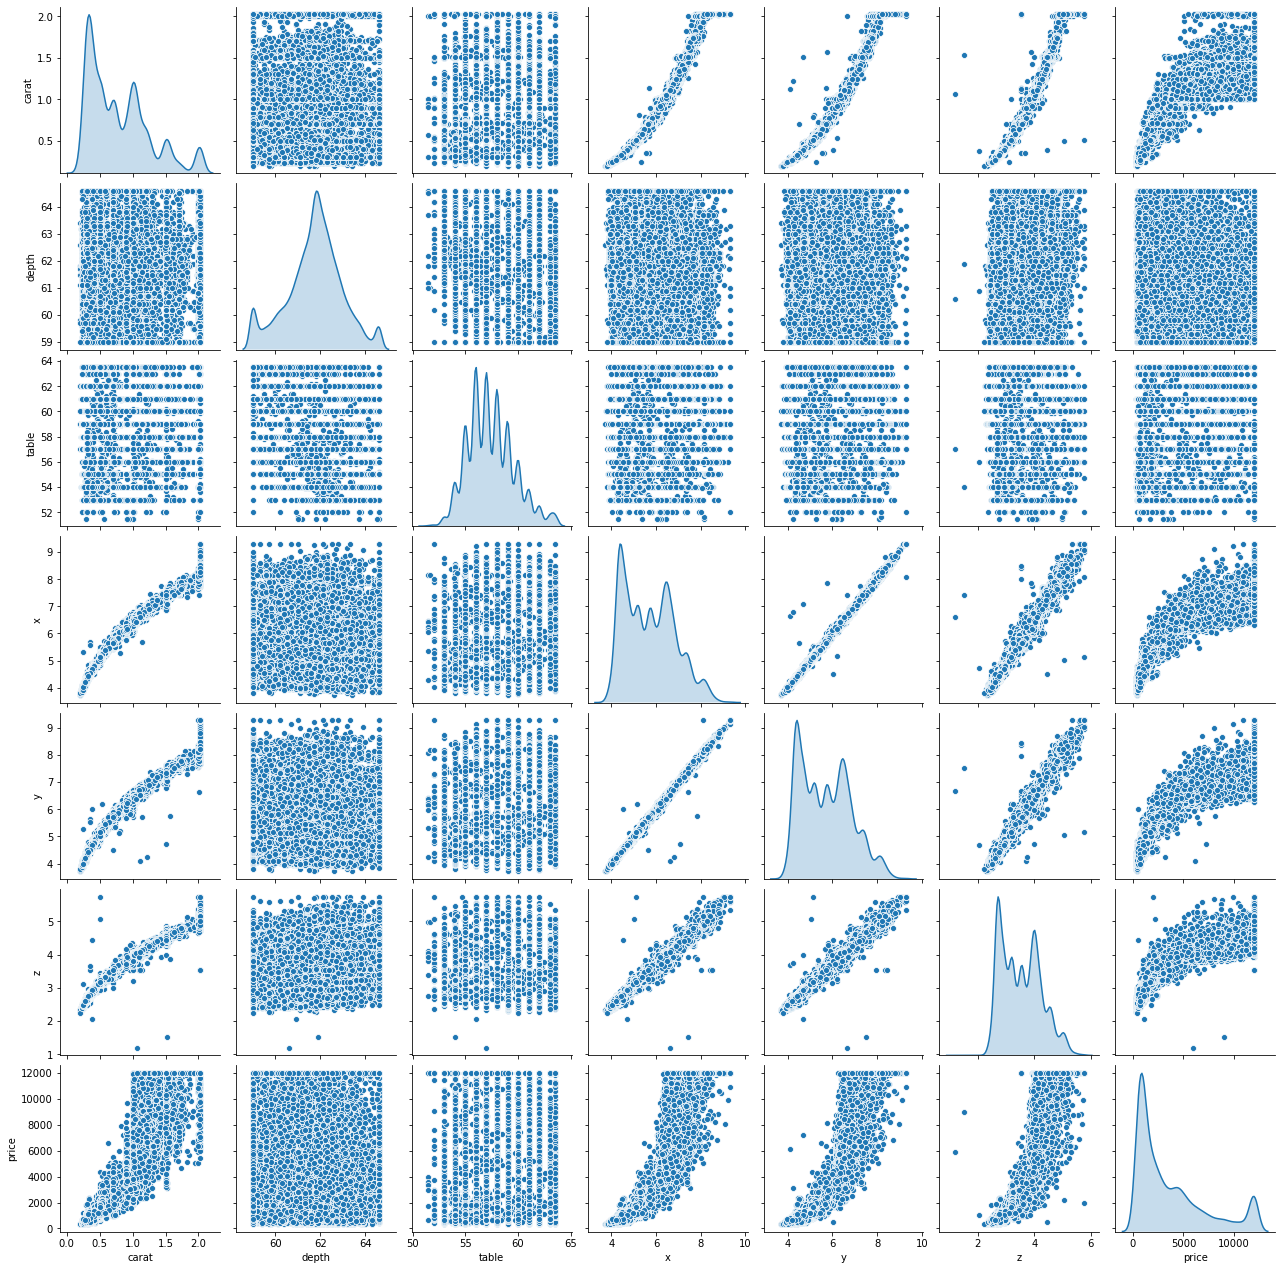

In [40]:
# Let us do a correlation analysis among the different dimensions and also each dimension with the dependent dimension
# This is done using scatter matrix function which creates a dashboard reflecting useful information about the dimensions
# The result can be stored as a .png file and opened in say, paint to get a larger view 

data_df_attr = data_df.iloc[:, 0:10]

#axes = pd.plotting.scatter_matrix(mpg_df_attr)
#plt.tight_layout()
#plt.savefig('d:\greatlakes\mpg_pairpanel.png')

sns.pairplot(data_df_attr, diag_kind='kde')   # to plot density curve instead of histogram

#sns.pairplot(mpg_df_attr)  # to plot histogram, the default

**Correlation Plot**

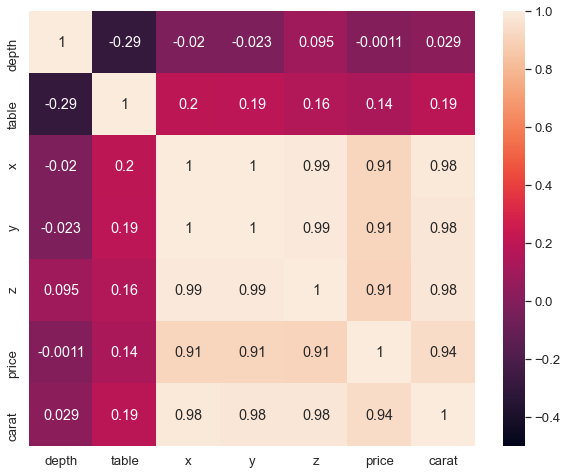

In [41]:
# construct heatmap with only continuous variables
plt.figure(figsize=(10,8))
sns.set(font_scale=1.2)
sns.heatmap(data_df[['depth', 'table', 'x', 'y','z','price','carat']].corr(), annot=True,vmin=-0.5,vmax=1)

**Apart from table and depth, all other variables are highly positively correlated**

In [395]:
data_df[data_df['x']=='0'].head(2)
data_df[data_df['y']=='0'].head(2)
data_df[data_df['z']=='0'].head(2)
data_df[data_df['table']=='0'].head(2)
data_df[data_df['depth']=='0'].head(2)
data_df[data_df['clarity']=='0'].head(2)
data_df[data_df['carat']=='0'].head(2)
data_df[data_df['price']=='0'].head(2)

C:\Users\RemotePC\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


,carat,cut,color,clarity,depth,table,x,y,z,price


In [43]:
data_df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499.0
1,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984.0
2,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289.0
3,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082.0
4,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779.0


In [126]:
data_df['cut'].unique()

array(['Ideal', 'Premium', 'Very Good', 'Good', 'Fair'], dtype=object)

**Convert Object Feature types for Linear regression**

In [430]:
data_df.replace(['Very Good'],['VeryGood'],inplace=True )

In [433]:
data_df['cut'].unique()

array(['4', '3', '2', '1', '0'], dtype=object)

In [431]:
data_df['cut']=np.where(data_df['cut'] =='Fair', '0', data_df['cut'])
data_df['cut']=np.where(data_df['cut'] =='Good', '1', data_df['cut'])
data_df['cut']=np.where(data_df['cut'] =='VeryGood', '2', data_df['cut'])
data_df['cut']=np.where(data_df['cut'] =='Premium', '3', data_df['cut'])
data_df['cut']=np.where(data_df['cut'] =='Ideal', '4', data_df['cut'])

In [399]:
data_df['color'].unique()

array(['E', 'G', 'F', 'D', 'H', 'J', 'I'], dtype=object)

In [432]:
data_df['color']=np.where(data_df['color'] =='J', '0', data_df['color'])
data_df['color']=np.where(data_df['color'] =='I', '1', data_df['color'])
data_df['color']=np.where(data_df['color'] =='H', '2', data_df['color'])
data_df['color']=np.where(data_df['color'] =='G', '3', data_df['color'])
data_df['color']=np.where(data_df['color'] =='F', '4', data_df['color'])
data_df['color']=np.where(data_df['color'] =='E', '5', data_df['color'])
data_df['color']=np.where(data_df['color'] =='D', '6', data_df['color'])


In [434]:
data_df['clarity'].unique()

array(['SI1', 'IF', 'VVS2', 'VS1', 'VVS1', 'VS2', 'SI2', 'I1'],
      dtype=object)

In [218]:
#data_df['clarity']=np.where(data_df['clarity'] =='I1', '0', data_df['clarity']).astype('int')
#data_df['clarity']=np.where(data_df['clarity'] =='SI2', '1', data_df['clarity']).astype('int')
#data_df['clarity']=np.where(data_df['clarity'] =='SI1', '2', data_df['clarity']).astype('int')
#data_df['clarity']=np.where(data_df['clarity'] =='VS2', '3', data_df['clarity']).astype('int')
#data_df['clarity']=np.where(data_df['clarity'] =='VS1', '4', data_df['clarity']).astype('int')
#data_df['clarity']=np.where(data_df['clarity'] =='VVS2', '5', data_df['clarity']).astype('int')
#data_df['clarity']=np.where(data_df['clarity'] =='VVS1', '6', data_df['clarity']).astype('int')
data_df['clarity']=np.where(data_df['clarity'] =='IF', '7', data_df['clarity'])
#data_df['clarity']=np.where(data_df['clarity'] =='FL', '7', data_df['clarity'])


ValueError: invalid literal for int() with base 10: 'SI1'

In [435]:
data_df = pd.get_dummies(data_df, columns=['clarity'],drop_first=True)
data_df.head()

,carat,cut,color,depth,table,x,y,z,price,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.30,4,5,62.1,58.0,4.27,4.29,2.66,499,0,1,0,0,0,0,0
1,0.33,3,3,60.8,58.0,4.42,4.46,2.70,984,1,0,0,0,0,0,0
2,0.90,2,5,62.2,60.0,6.04,6.12,3.78,6289,0,0,0,0,0,0,1
3,0.42,4,4,61.6,56.0,4.82,4.80,2.96,1082,0,0,0,1,0,0,0
4,0.31,4,4,60.4,59.0,4.35,4.43,2.65,779,0,0,0,0,0,1,0


In [226]:
data_df.head()

,carat,cut,color,depth,table,x,y,z,price,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.30,4,5,62.1,58.0,4.27,4.29,2.66,499,0,1,0,0,0,0,0
1,0.33,3,3,60.8,58.0,4.42,4.46,2.70,984,1,0,0,0,0,0,0
2,0.90,2,5,62.2,60.0,6.04,6.12,3.78,6289,0,0,0,0,0,0,1
3,0.42,4,4,61.6,56.0,4.82,4.80,2.96,1082,0,0,0,1,0,0,0
4,0.31,4,4,60.4,59.0,4.35,4.43,2.65,779,0,0,0,0,0,1,0


In [29]:
data_df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
carat,26933,NaN,NaN,NaN,0.793298,0.462127,0.2,0.4,0.7,1.05,2.025
cut,26933,5,4,10805,NaN,NaN,NaN,NaN,NaN,NaN,NaN
color,26933,7,3,5653,NaN,NaN,NaN,NaN,NaN,NaN,NaN
clarity,26933,8,2,6565,NaN,NaN,NaN,NaN,NaN,NaN,NaN
depth,26933,NaN,NaN,NaN,61.7505,1.21853,59,61.1,61.8,62.5,64.6
table,26933,NaN,NaN,NaN,57.4355,2.15712,51.5,56,57,59,63.5
x,26933,NaN,NaN,NaN,5.7296,1.1257,3.73,4.71,5.69,6.55,9.31
y,26933,NaN,NaN,NaN,5.73153,1.11768,3.71,4.72,5.7,6.54,9.28
z,26933,NaN,NaN,NaN,3.53762,0.695577,1.19,2.9,3.52,4.04,5.75
price,26933,NaN,NaN,NaN,3736.49,3469.77,326,945,2375,5356,11982.5


In [99]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26933 entries, 0 to 26966
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   carat         26933 non-null  float64
 1   cut           26933 non-null  object 
 2   color         26933 non-null  object 
 3   depth         26933 non-null  float64
 4   table         26933 non-null  float64
 5   x             26933 non-null  float64
 6   y             26933 non-null  float64
 7   z             26933 non-null  float64
 8   price         26933 non-null  int64  
 9   clarity_IF    26933 non-null  uint8  
 10  clarity_SI1   26933 non-null  uint8  
 11  clarity_SI2   26933 non-null  uint8  
 12  clarity_VS1   26933 non-null  uint8  
 13  clarity_VS2   26933 non-null  uint8  
 14  clarity_VVS1  26933 non-null  uint8  
 15  clarity_VVS2  26933 non-null  uint8  
dtypes: float64(6), int64(1), object(2), uint8(7)
memory usage: 2.2+ MB


In [436]:
# Copy all the predictor variables into X dataframe. Since 'price' is dependent variable drop it
X = data_df.drop('price', axis=1)


# Copy the 'price' column alone into the y dataframe. This is the dependent variable
y = data_df[['price']]


In [405]:
X

,carat,cut,color,depth,table,x,y,z,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.30,4,5,62.1,58.0,4.27,4.29,2.66,0,1,0,0,0,0,0
1,0.33,3,3,60.8,58.0,4.42,4.46,2.70,1,0,0,0,0,0,0
2,0.90,2,5,62.2,60.0,6.04,6.12,3.78,0,0,0,0,0,0,1
3,0.42,4,4,61.6,56.0,4.82,4.80,2.96,0,0,0,1,0,0,0
4,0.31,4,4,60.4,59.0,4.35,4.43,2.65,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26962,1.11,3,3,62.3,58.0,6.61,6.52,4.09,0,1,0,0,0,0,0
26963,0.33,4,2,61.9,55.0,4.44,4.42,2.74,1,0,0,0,0,0,0
26964,0.51,3,5,61.7,58.0,5.12,5.15,3.17,0,0,0,0,1,0,0
26965,0.27,2,4,61.8,56.0,4.19,4.20,2.60,0,0,0,0,0,0,1


In [372]:
y

,price
0,499
1,984
2,6289
3,1082
4,779
...,...
26962,5408
26963,1114
26964,1656
26965,682


In [437]:
# Split X and y into training and test set in 75:25 ratio

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1)

In [438]:
# invoke the LinearRegression function and find the bestfit model on training data

regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression()

In [439]:
# Let us explore the coefficients for each of the independent attributes

for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for carat is 13723.441529467134
The coefficient for cut is 122.55626598533823
The coefficient for color is 332.7563912804906
The coefficient for depth is -59.09264919580789
The coefficient for table is -29.439054076343993
The coefficient for x is -2391.7674714490213
The coefficient for y is 987.2552188916939
The coefficient for z is -815.4466897294059
The coefficient for clarity_IF is 4774.72043870016
The coefficient for clarity_SI1 is 2999.4964079373503
The coefficient for clarity_SI2 is 2077.4474429483957
The coefficient for clarity_VS1 is 3935.537730553402
The coefficient for clarity_VS2 is 3602.073996321379
The coefficient for clarity_VVS1 is 4412.229613570167
The coefficient for clarity_VVS2 is 4357.253483908101


In [440]:
# Let us check the intercept for the model

intercept = regression_model.intercept_[0]

print("The intercept for our model is {}".format(intercept))

The intercept for our model is 4472.599152458577


In [441]:
regression_model.score(X_train, y_train)

0.922249861918897

In [442]:
# Model score - R2 or coeff of determinant
# R^2=1–RSS / TSS =  RegErr / TSS

regression_model.score(X_test, y_test)

0.9266692946150076

In [143]:
# ---------------------------------- Using Statsmodel library to get R type outputs -----------------------------

In [443]:
# R^2 is not a reliable metric as it always increases with addition of more attributes even if the attributes have no 
# influence on the predicted variable. Instead we use adjusted R^2 which removes the statistical chance that improves R^2
# Scikit does not provide a facility for adjusted R^2... so we use 
# statsmodel, a library that gives results similar to
# what you obtain in R language
# This library expects the X and Y to be given in one single dataframe

data_train = pd.concat([X_train, y_train], axis=1)
data_train.head()

,carat,cut,color,depth,table,x,y,z,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2,price
22114,0.34,2,2,62.4,60.0,4.41,4.44,2.76,0,0,0,0,1,0,0,537
2275,0.30,4,5,61.2,55.0,4.35,4.31,2.65,0,0,0,0,1,0,0,844
19183,0.50,4,3,62.5,57.0,5.09,5.05,3.17,0,1,0,0,0,0,0,1240
5030,1.10,1,5,63.3,56.0,6.53,6.58,4.15,0,0,1,0,0,0,0,4065
25414,1.02,3,4,61.1,62.0,6.54,6.49,3.98,0,0,1,0,0,0,0,4057


In [444]:
import statsmodels.formula.api as smf
lm1 = smf.ols(formula= 'price ~ carat+cut+color+depth+table+x+y+z+clarity_IF+clarity_SI1+clarity_SI2+clarity_VS1+clarity_VS2+clarity_VVS1+clarity_VVS2', data = data_train).fit()
lm1.params

Intercept        3998.890344
cut[T.1]          568.435869
cut[T.2]          700.266846
cut[T.3]          774.856955
cut[T.4]          850.337836
color[T.1]        792.991755
color[T.2]       1285.801825
color[T.3]       1809.927843
color[T.4]       2022.328983
color[T.5]       2131.634235
color[T.6]       2327.971221
carat           13877.367484
depth             -59.755428
table             -32.673381
x               -2287.037197
y                 784.076195
z                -744.147392
clarity_IF       4633.089608
clarity_SI1      2959.645593
clarity_SI2      2029.377109
clarity_VS1      3864.862707
clarity_VS2      3551.881880
clarity_VVS1     4305.625724
clarity_VVS2     4263.639410
dtype: float64

In [445]:
print(lm1.summary())  #Inferential statistics

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.925
Model:                            OLS   Adj. R-squared:                  0.925
Method:                 Least Squares   F-statistic:                 1.012e+04
Date:                Wed, 14 Apr 2021   Prob (F-statistic):               0.00
Time:                        16:44:03   Log-Likelihood:            -1.5873e+05
No. Observations:               18853   AIC:                         3.175e+05
Df Residuals:                   18829   BIC:                         3.177e+05
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     3998.8903    856.795      4.667   

In [257]:
# Let us check the sum of squared errors by predicting value of y for test cases and 
# subtracting from the actual y for the test cases

mse = np.mean((regression_model.predict(X_test)-y_test)**2)

In [366]:
# underroot of mean_sq_error is standard deviation i.e. avg variance between predicted and actual

import math

math.sqrt(mse)

1114.8129613144856

In [446]:
#RMSE on Training data
predicted_train=regression_model.fit(X_train, y_train).predict(X_train)
RMSE_T = np.sqrt(metrics.mean_squared_error(y_train,predicted_train))
print("The RMSE of Train set for our model is {}".format(RMSE_T))

The RMSE of Train set for our model is 1117.9855875879305


In [368]:
# Let us check the sum of squared errors by predicting value of y for test cases and 
# subtracting from the actual y for the test cases

mse_t = np.mean((regression_model.predict(X_train)-y_train)**2)

In [369]:
# underroot of mean_sq_error is standard deviation i.e. avg variance between predicted and actual

import math

math.sqrt(mse_t)

1114.8129613144856

In [259]:
# Model score - R2 or coeff of determinant
# R^2=1–RSS / TSS

regression_model.score(X_test, y_test)

0.9271466057139681

In [260]:
# predict mileage (mpg) for a set of attributes not in the training or test set
y_pred = regression_model.predict(X_test)

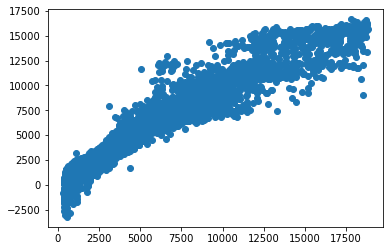

In [261]:
# Since this is regression, plot the predicted y value vs actual y values for the test data
# A good model's prediction will be close to actual leading to high R and R2 values
#plt.rcParams['figure.dpi'] = 500



plt.scatter(y_test['price'], y_pred)

In [447]:
for i,j in np.array(lm1.params.reset_index()):
    print('({}) * {} +'.format(round(j,2),i),end=' ')

(3998.89) * Intercept + (568.44) * cut[T.1] + (700.27) * cut[T.2] + (774.86) * cut[T.3] + (850.34) * cut[T.4] + (792.99) * color[T.1] + (1285.8) * color[T.2] + (1809.93) * color[T.3] + (2022.33) * color[T.4] + (2131.63) * color[T.5] + (2327.97) * color[T.6] + (13877.37) * carat + (-59.76) * depth + (-32.67) * table + (-2287.04) * x + (784.08) * y + (-744.15) * z + (4633.09) * clarity_IF + (2959.65) * clarity_SI1 + (2029.38) * clarity_SI2 + (3864.86) * clarity_VS1 + (3551.88) * clarity_VS2 + (4305.63) * clarity_VVS1 + (4263.64) * clarity_VVS2 + 

In [154]:
# How do we improve the model? the R^2 is .844, how do we improve it
# The indpendent attributes have different units and scales of measurement 
# It is always a good practice to scale all the dimensions using z scores or someother methode to address the problem of different scales 


In [65]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26933 entries, 0 to 26966
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    26933 non-null  float64
 1   cut      26933 non-null  object 
 2   color    26933 non-null  object 
 3   clarity  26933 non-null  object 
 4   depth    26933 non-null  float64
 5   table    26933 non-null  float64
 6   x        26933 non-null  float64
 7   y        26933 non-null  float64
 8   z        26933 non-null  float64
 9   price    26933 non-null  float64
dtypes: float64(7), object(3)
memory usage: 3.5+ MB


In [332]:
data = data_df.copy()

In [338]:
ss=StandardScaler()
num_d = data.select_dtypes(exclude = ['object'])
data[num_d.columns]= ss.fit_transform(num_d)

In [339]:
data

,carat,cut,color,depth,table,x,y,z,price,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,-1.067471,4,5,0.286857,0.261676,-1.296636,-1.289780,-1.261738,-0.854828,-0.184970,1.761395,-0.451699,-0.422958,-0.540713,-0.270711,-0.321987
1,-1.002552,3,3,-0.780022,0.261676,-1.163383,-1.137676,-1.204231,-0.734256,5.406277,-0.567732,-0.451699,-0.422958,-0.540713,-0.270711,-0.321987
2,0.230898,2,5,0.368925,1.188856,0.275743,0.347575,0.348465,0.584584,-0.184970,-0.567732,-0.451699,-0.422958,-0.540713,-0.270711,3.105713
3,-0.807797,4,4,-0.123481,-0.665503,-0.808043,-0.833468,-0.830434,-0.709892,-0.184970,-0.567732,-0.451699,2.364301,-0.540713,-0.270711,-0.321987
4,-1.045831,4,4,-1.108292,0.725266,-1.225568,-1.164518,-1.276115,-0.785219,-0.184970,-0.567732,-0.451699,-0.422958,-0.540713,3.693976,-0.321987
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26962,0.685328,3,3,0.450993,0.261676,0.782102,0.705467,0.794146,0.365564,-0.184970,1.761395,-0.451699,-0.422958,-0.540713,-0.270711,-0.321987
26963,-1.002552,4,2,0.122722,-1.129093,-1.145616,-1.173465,-1.146724,-0.701937,5.406277,-0.567732,-0.451699,-0.422958,-0.540713,-0.270711,-0.321987
26964,-0.613042,3,5,-0.041413,0.261676,-0.541539,-0.520312,-0.528521,-0.567194,-0.184970,-0.567732,-0.451699,-0.422958,1.849410,-0.270711,-0.321987
26965,-1.132389,2,4,0.040654,-0.665503,-1.367703,-1.370305,-1.347999,-0.809334,-0.184970,-0.567732,-0.451699,-0.422958,-0.540713,-0.270711,3.105713


In [340]:
# Copy all the predictor variables into X dataframe. Since 'price' is dependent variable drop it
X1 = data.drop('price', axis=1)


# Copy the 'price' column alone into the y dataframe. This is the dependent variable
y1 = data[['price']]

In [341]:
# Split X and y into training and test set in 75:25 ratio

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.30 , random_state=1)

In [286]:
ss=StandardScaler() 
# we are scaling the data for ANN. Without scaling it will give very poor results. Computations becomes easier
X_train_scaled=ss.fit_transform(X_train)
X_test_scaled=ss.transform(X_test)


In [301]:
from sklearn.preprocessing import StandardScaler 
sc = StandardScaler() 
X_train_scaled = sc.fit_transform(X1_train) 
X_test_scaled = sc.transform (X1_test)
y_train_scaled = sc.fit_transform(y1_train) 
y_test_scaled = sc.transform (y1_test)

In [343]:
# invoke the LinearRegression function and find the bestfit model on training data

regression_model_sc = LinearRegression()

In [347]:
rmse_train=[]
rmse_test=[]
scores_train=[]
scores_test=[]

In [348]:
regression_model_sc.fit(X_train_scaled,y_train_scaled)
scores_train.append(regression_model_sc.score(X1_train, y1_train))
scores_test.append(regression_model_sc.score(X1_test, y1_test))
rmse_train.append(np.sqrt(mean_squared_error(y1_train,regression_model_sc.predict(X1_train))))
rmse_test.append(np.sqrt(mean_squared_error(y1_test,regression_model_sc.predict(X1_test))))

##X1_train, X1_test, y1_train, y1_test
        
print(pd.DataFrame({'Train RMSE': rmse_train,'Test RMSE': rmse_test,'Training Score':scores_train,'Test Score': scores_test},
            index=['Linear Regression']))

                   Train RMSE  Test RMSE  Training Score  Test Score
Linear Regression    0.648381   0.649226        0.576867    0.584765


In [349]:
intercept = regression_model_sc.intercept_[0]

print("The intercept for our model is {}".format(intercept))

The intercept for our model is -8.763184942020314e-16


In [350]:
# Let us explore the coefficients for each of the independent attributes

for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model_sc.coef_[0][idx]))

The coefficient for carat is 1.5957410550836162
The coefficient for cut is 0.0333985210243066
The coefficient for color is 0.14164918374393917
The coefficient for depth is -0.005129959476642126
The coefficient for table is -0.016217360769649504
The coefficient for x is -0.6201838492846241
The coefficient for y is 0.32755807124639874
The coefficient for z is -0.2649774179368114
The coefficient for clarity_IF is 0.209841412887319
The coefficient for clarity_SI1 is 0.3183463982177734
The coefficient for clarity_SI2 is 0.19246132571103966
The coefficient for clarity_VS1 is 0.3504376849686532
The coefficient for clarity_VS2 is 0.37172894199918066
The coefficient for clarity_VVS1 is 0.27794147105850814
The coefficient for clarity_VVS2 is 0.3162457878661995


In [449]:
# Model score - R2 or coeff of determinant
# R^2=1–RSS / TSS

regression_model.score(X1_test, y1_test)

-151540319.61213169

In [352]:
# Let us check the sum of squared errors by predicting value of y for training cases and 
# subtracting from the actual y for the training cases

mse = np.mean((regression_model.predict(X1_test)-y1_test)**2)

In [354]:
# underroot of mean_sq_error is standard deviation i.e. avg variance between predicted and actual

import math

math.sqrt(mse)

11358.471756909506

In [356]:
# predict mileage (mpg) for a set of attributes not in the training or test set
y_pred = regression_model.predict(X1_test)

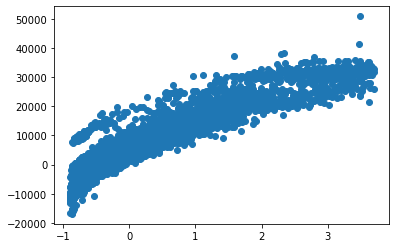

In [358]:
# Since this is regression, plot the predicted y value vs actual y values for the test data
# A good model's prediction will be close to actual leading to high R and R2 values
plt.scatter(y1_test['price'], y_pred)